## **Analyzing Wildfire Activities in `Australia`**

Import reqired libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns
sns.set_theme()


# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations.


In [4]:
df =pd.read_csv("Australia_Widlfile_data.csv")
print("Data imported.")

Data imported.


In [5]:
df.head()

,Unnamed: 0,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [6]:
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
df.shape

(26406, 10)

In [8]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns.

In [9]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [10]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

#### **Let's try to understand the change in average estimated fire area over time.**


In [11]:
df_new =  df.groupby('Year')['Estimated_fire_area'].mean()
df_new.head()

Year
2005     92.770501
2006    176.289434
2007    153.112464
2008     99.758968
2009    141.624955
Name: Estimated_fire_area, dtype: float64

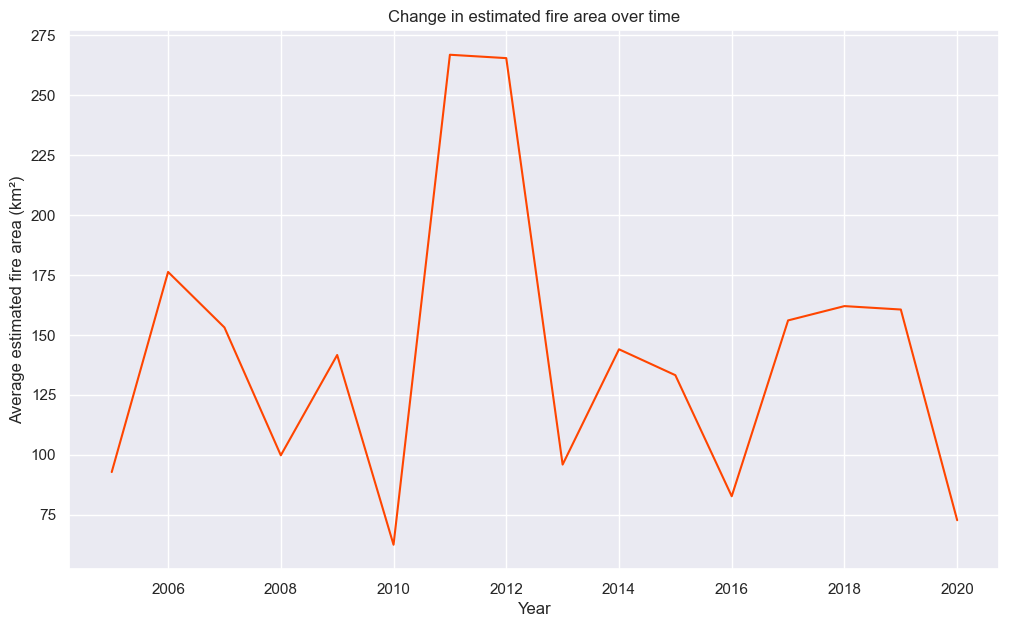

In [13]:
plt.figure(figsize= (12,7))
df_new.plot(x = df_new.index, y = df_new.values, color ='orangered')
plt.xlabel('Year')
plt.ylabel("Average estimated fire area (km²)")
plt.title("Change in estimated fire area over time")
plt.grid(True)
plt.show()

#### **We can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.**

In [15]:
df_new_ym = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
df_new_ym.head()

Year  Month
2005  1         70.619908
      2        101.018747
      3         40.901576
      4         69.305388
      5         93.834520
Name: Estimated_fire_area, dtype: float64

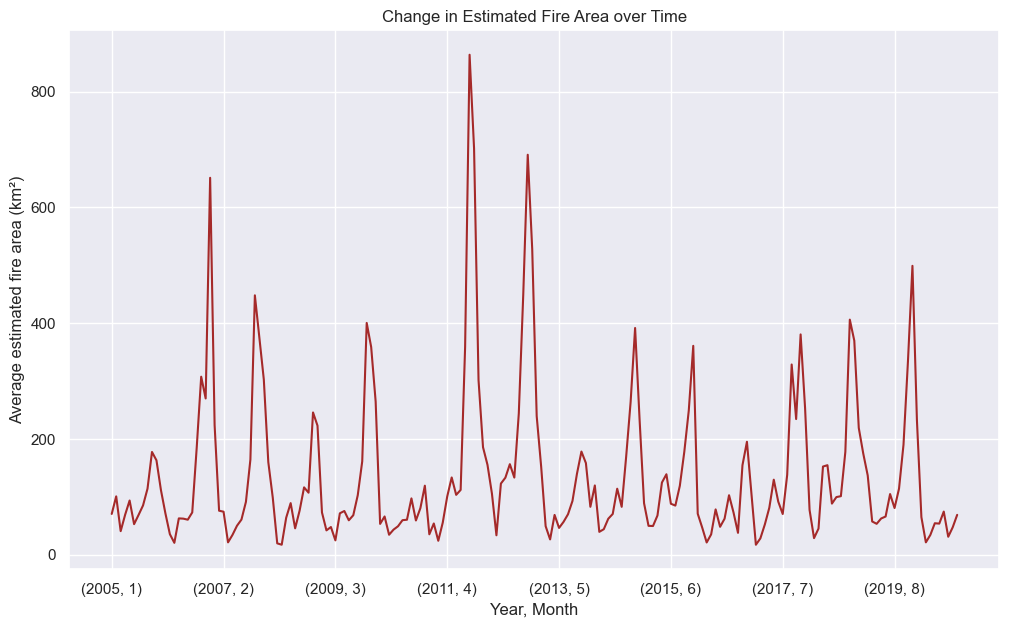

In [25]:
plt.figure(figsize=(12,7))
df_new_ym.plot(kind ='line',
               linestyle ='-',
               x =df_new_ym.index, 
               y = df_new_ym.values,
               color ='brown')

plt.xlabel('Year, Month')
plt.ylabel("Average estimated fire area (km²)")
plt.title("Change in Estimated Fire Area over Time")
plt.grid(True)
plt.show()

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia.

#### **Let's have an insight on the distribution of mean estimated fire brightness across the regions. We can use the functionality of Plotly to develop a barplot.**

Let's find out the unique regions given in our dataset.

In [26]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [30]:
import plotly.express as px
import plotly.graph_objects as go

In [39]:
bar_data= df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()
fig =px.bar(bar_data, x = 'Region', y ='Mean_estimated_fire_brightness',
            title ='Distribution of Mean Estimated Fire Brightness across Regions',
            color =bar_data['Region'])
fig.show()

#### **Let's find the portion of count of pixels for presumed vegetation fires vary across regions.We will develop a pie chart for this.**


In [40]:
region_count = df.groupby('Region')['Count'].sum()
region_count

Region
NSW    117412
NT     649430
QL     420882
SA      35160
TA      11473
VI      52473
WA     615968
Name: Count, dtype: int64

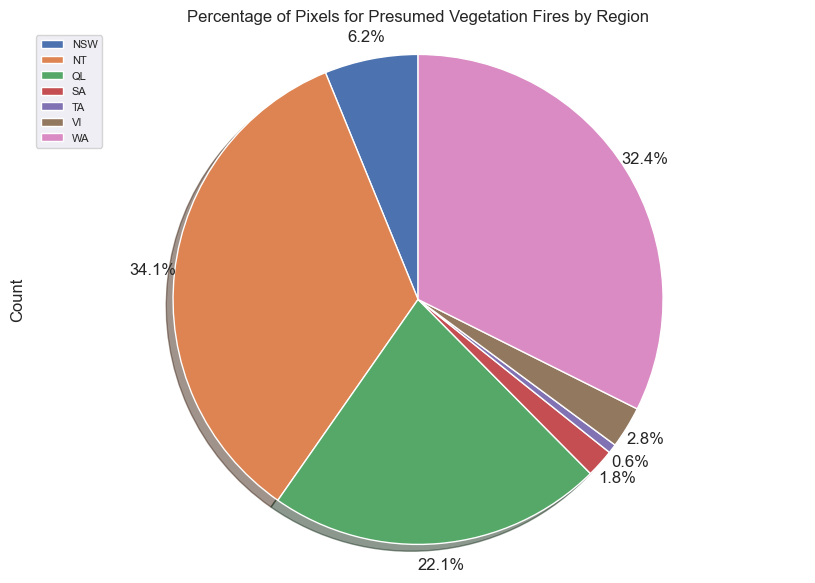

In [44]:
region_count.plot(kind ='pie',
                  figsize=(10,7),
                  autopct ='%1.1f%%',
                  startangle =90,
                  shadow =True,
                  labels =None,
                  pctdistance =1.09,
                  )
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend(labels =region_count.index, loc = 'upper left', fontsize =8)
plt.axis('equal')
plt.show()


#### **Let's try to develop a histogram of the mean estimated fire brightness.**

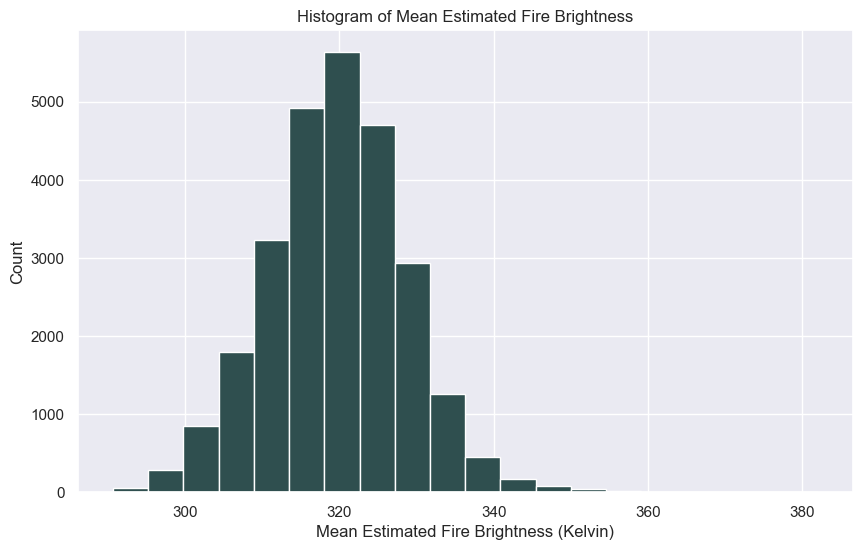

In [51]:
df['Mean_estimated_fire_brightness'].plot(kind ='hist',
                                          figsize =(10,6),
                                          bins =20,
                                          color = 'darkslategrey')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

Let's use the functionality of seaborn and  pass region as hue. It will help us understand the distribution of estimated fire brightness across regions.

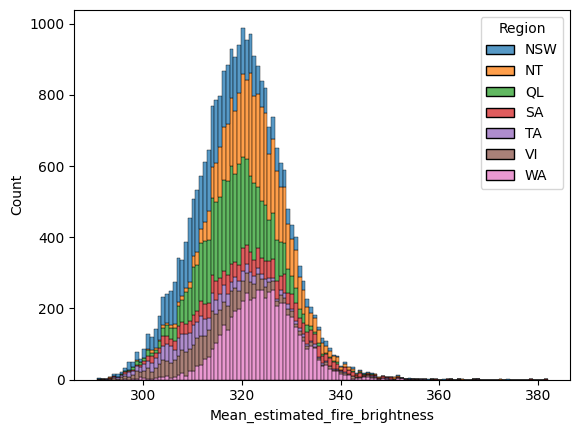

In [59]:
sns.histplot(data =df, x ='Mean_estimated_fire_brightness', 
             hue ='Region',
             multiple= 'stack')
sns.reset_orig()
plt.show()

#### **Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?**

In [65]:
fig =px.scatter(df,
                x ='Mean_estimated_fire_radiative_power', y ='Mean_confidence',
                color = df['Region'],
                title = 'Mean estimated fire radiative power VS Mean confidence level')

fig.show()

#### **Let's mark the seven regions on the Map of Australia using Folium. We need to created a dataframe containing the regions, their latitudes and longitudes. For australia we use [-25, 135] as location to create the map.**


In [68]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [71]:
import folium.features


australia_map = folium.Map(location =[-25, 135], zoom_start =4, tiles = 'cartodb dark matter')

aus_reg = folium.map.FeatureGroup()
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
        [lat, lng],
            popup =lab,
            radius =5, # define how big you want the circle markers to be
            color ='red',
            fill =True,
            fill_color ='blue',
            fill_opacity = 0.6    
        )
    )
    
australia_map.add_child(aus_reg)    

Now we have successfully marked the 7 Wildfire regions on Australia map.<br> This concludes our data visualization on Australian Wildlifre data.